In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"
df = pd.read_csv(url)

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [2]:
# Initial exploration
print("\nMissing values:\n", df.isna().sum())
print("\nSpecies distribution:\n", df['species'].value_counts())


Missing values:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Species distribution:
 species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [3]:
# Handle missing values
df = df.dropna()

# Convert categorical features
df = pd.get_dummies(df, columns=['island', 'sex'], drop_first=True)

# Feature selection
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 
            'body_mass_g', 'island_Dream', 'island_Torgersen', 
            'sex_male']

target = 'species'

X = df[features]
y = df[target]

In [4]:
# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all available CPU cores
)

# Execute the grid search
grid_search.fit(X_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}%".format(grid_search.best_score_*100))

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nTest set accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 99.62%

Test set accuracy: 100.00%


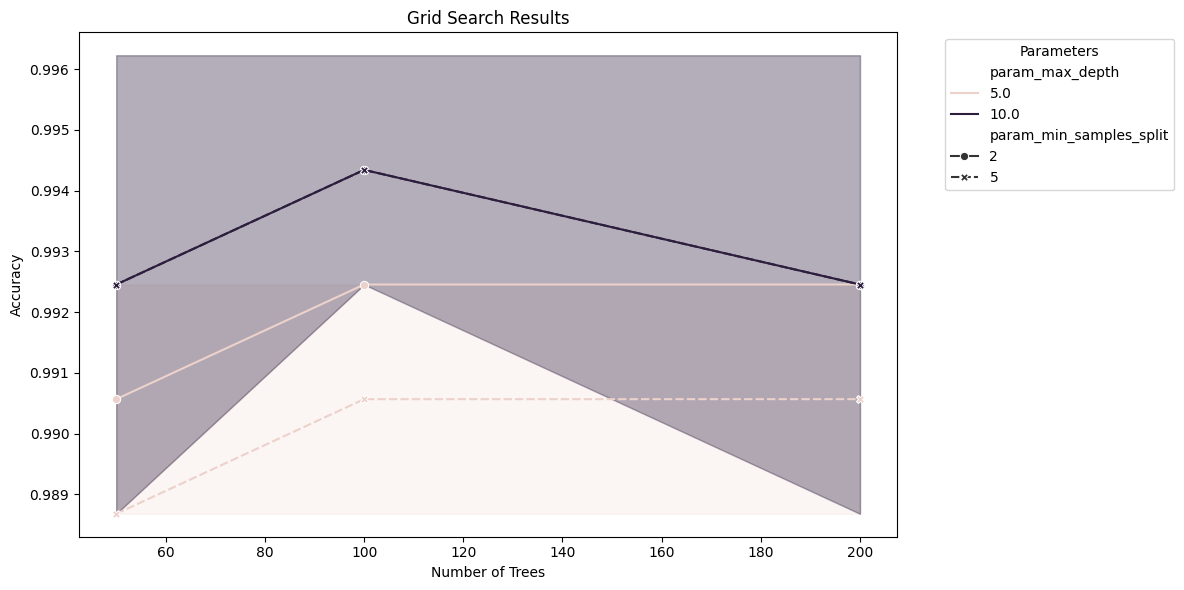

In [9]:
# Convert results to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Plot accuracy vs parameters
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=results,
    x='param_n_estimators',
    y='mean_test_score',
    hue='param_max_depth',
    style='param_min_samples_split',
    markers=True
)
plt.title("Grid Search Results")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend(title="Parameters", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [13]:
# Save both model and feature names
import joblib
joblib.dump({
    'model': best_model,
    'features': features,
    'classes': best_model.classes_
}, 'penguin_model.joblib')

print("Model saved successfully!")

Model saved successfully!
